In [17]:
import neurolab as nl
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Create train samples
i1 = np.random.rand(750,2)
i2 = np.random.rand(750,2)

# normalization
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
n1 = scaler.fit_transform(i1)
n2 = scaler.fit_transform(i2)

class1 = np.hstack((np.zeros([250,1]),np.ones([250,1])*0.5))
class2 = np.hstack((np.sin(n1[250:500,0]).reshape(250,1),np.cos(n1[250:500,1]).reshape(250,1)))
class3 = np.hstack((np.ones([250,1]),np.zeros([250,1])))

class2_test = np.hstack((np.sin(n2[250:500,0]).reshape(250,1),np.cos(n2[250:500,1]).reshape(250,1)))

t1 = np.vstack((class1,class2))
t1 = np.vstack((t1,class3))
t2 = np.vstack((class1,class2_test))
t2 = np.vstack((t2,class3))

Epoch: 10; Error: 0.20485187329416443;
Epoch: 20; Error: 0.23299077866736112;
Epoch: 30; Error: 0.2047331675204811;
Epoch: 40; Error: 0.20574193196378404;
Epoch: 50; Error: 0.20776263918883228;
Epoch: 60; Error: 0.2047163497615557;
Epoch: 70; Error: 0.20486101422793607;
Epoch: 80; Error: 0.2046422034771501;
Epoch: 90; Error: 0.20455601585716127;
Epoch: 100; Error: 0.20454572734832266;
The maximum number of train epochs is reached


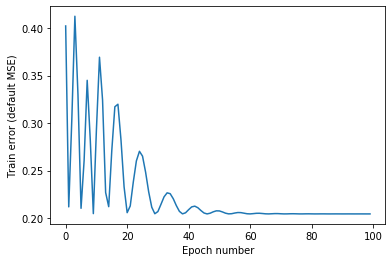

In [28]:
input = n1
target = t1
# Create network with 4 layers
net = nl.net.newelm([[-0.5, 0.5],[-0.5, 0.5]],[10,5,6,2], [nl.trans.SatLin(),nl.trans.LogSig(),nl.trans.TanSig(),nl.trans.PureLin()])
# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[2].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[3].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Train network
error = net.train(input, target, epochs=100, show=10, goal=0.01,lr=0.01)
# Simulate network
output = net.sim(input)

# Plot result
import pylab as pl
%matplotlib inline

#pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (default MSE)')

#pl.subplot(212)
#pl.plot(i1.reshape(13),output.reshape(13))
#pl.legend(['net output'],'upper right')
pl.show()

In [29]:
f = nl.error.MSE()
output = net.sim(n2)
f(output, t2)



0.2018508020147744

In [30]:
output

array([[0.32480815, 0.48282454],
       [0.32483654, 0.48287117],
       [0.32495805, 0.48307206],
       ...,
       [0.32483525, 0.48286905],
       [0.32487453, 0.48294032],
       [0.32498556, 0.48311591]])

In [27]:
output = net.sim(n1)
output[300]

array([0.56652875, 0.41509017])